### Dependencies

In [228]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter

/var/folders/7z/3v8k89lj23951gywfb99fknc0000gn/T/ipykernel_42424/3198767643.py:4: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


### Load results

In [248]:
# figure out what frames to remove (to account for fixation)

# remove all frames that happened within 200ms of each dot onset
# 30Hz, so 200ms is about 6 frames (remove first 6 frames after each dot onset)
dotInfo_225539 = json.load(open('../data/app_data/042523-22:55:39/dotInfo.json'))
dotNum_225539 = dotInfo_225539['DotNum']

# each of these indices is the first index at which a new dot is shown
change_indices_225539 = [i for i in range(1, len(dotNum_225539)) if dotNum_225539[i] != dotNum_225539[i-1]]

# change_indices_225539 = [0, 80, 86, 87, 260, 266, 267, 351]
# ignore 86, 87, 266, 267... (app errors)
# manually removed frames 0-5, 80-85, 171-176, 260-265, 351-356 (6 frames after each dot onset)

# =================================================

dotInfo_143234 = json.load(open('../data/app_data/042523-14:32:34/dotInfo.json'))
dotNum_143234 = dotInfo_143234['DotNum']
change_indices_143234 = [i for i in range(1, len(dotNum_143234)) if dotNum_143234[i] != dotNum_143234[i-1]]
# change_indices_143234 = [111]
# manually removed frames 111-116 (6 frames after each dot onset)

In [320]:
dotInfo_0427 = json.load(open('../data/app_data/042723-20:55:49/dotInfo.json'))
dotNum_0427 = dotInfo_0427['DotNum']
change_indices_0427 = [i for i in range(1, len(dotNum_0427)) if dotNum_0427[i] != dotNum_0427[i-1]]
# change_indices_0427 = [80, 88, 89, 171, 260, 268, 269, 350, 351, 352]
# ignore 88, 89, 268, 269, 351, 352... (app errors)
# manually removed frames 0-5, 80-85, 171-176, 260-265, 350-355 (6 frames after each dot onset)

In [285]:
# read in file
# 22:55:39 fixation points not removed
results = json.load(open('../data/results/converted_042523-22:55:39_results.json'))
err = np.array(results['error'])
preds = np.array(results['preds'])
gt = np.array(results['ground_truths'])
orientation = np.array(results['orientation'])

# 22:55:39 fixation points removed
results2 = json.load(open('../data/results/converted_042523-22:55:39_2_results.json'))
err2 = np.array(results2['error'])
preds2 = np.array(results2['preds'])
gt2 = np.array(results2['ground_truths'])
orientation2 = np.array(results2['orientation'])

# 14:32:34 fixation points not removed
results3 = json.load(open('../data/results/converted_042523-14:32:34_results.json'))
err3 = np.array(results3['error'])
preds3 = np.array(results3['preds'])
gt3 = np.array(results3['ground_truths'])
orientation3 = np.array(results3['orientation'])

# 14:32:34 fixation points removed
results4 = json.load(open('../data/results/converted_042523-14:32:34_2_results.json'))
err4 = np.array(results4['error'])
preds4 = np.array(results4['preds'])
gt4 = np.array(results4['ground_truths'])
orientation4 = np.array(results4['orientation'])

### Basic Statistics

In [286]:
print("22:55:39 with all points (mean): ", np.mean(err))
print("22:55:39 with all points (median): ", np.median(err))
print("22:55:39 with first 6 frames after each dot onset removed (mean): ", np.mean(err2))
print("22:55:39 with first 6 frames after each dot onset removed (median): ", np.median(err2))

print("14:32:34 with all points (mean): ", np.mean(err3))
print("14:32:34 with all points (median): ", np.median(err3))
print("14:32:34 with first 6 frames after each dot onset removed (mean): ", np.mean(err4))
print("14:32:34 with first 6 frames after each dot onset removed (median): ", np.median(err4))

22:55:39 with all points (mean):  2.468456171355393
22:55:39 with all points (median):  2.295041561126709
22:55:39 with first 6 frames after each dot onset removed (mean):  2.404965614743322
22:55:39 with first 6 frames after each dot onset removed (median):  2.254698872566223
14:32:34 with all points (mean):  2.031116214509194
14:32:34 with all points (median):  1.924058973789215
14:32:34 with first 6 frames after each dot onset removed (mean):  1.9978201843724392
14:32:34 with first 6 frames after each dot onset removed (median):  1.911125659942627


### Error Distributions (Accounting for Fixation Time vs. Not)

Text(0.5, 1.0, 'error distribution for \n042523-22:55:39 (fixation points removed)')

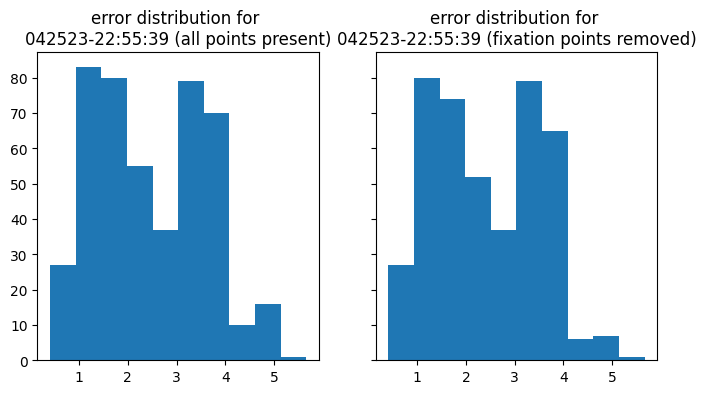

In [287]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 4))
ax[0].hist(err, bins=10)
ax[0].set_title("error distribution for \n042523-22:55:39 (all points present)")
ax[1].hist(err2, bins=10)
ax[1].set_title("error distribution for \n042523-22:55:39 (fixation points removed)")

Text(0.5, 1.0, 'error distribution for \n042523-14:32:34 (fixation points removed)')

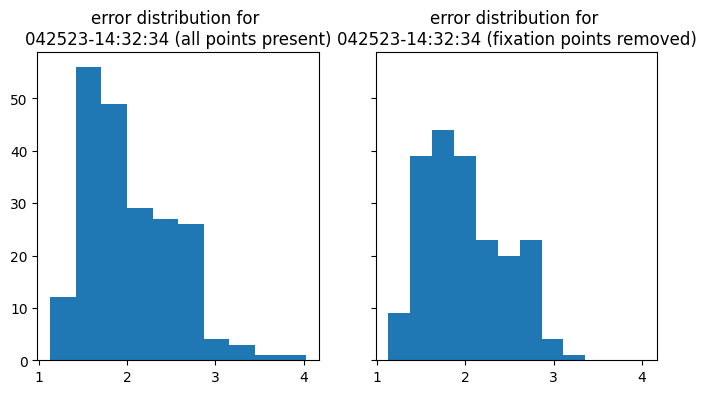

In [294]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 4))
ax[0].hist(err3, bins=10)
ax[0].set_title("error distribution for \n042523-14:32:34 (all points present)")
ax[1].hist(err4, bins=9)
ax[1].set_title("error distribution for \n042523-14:32:34 (fixation points removed)")

### Visualize Prediction Points & Ground Truth Labels

In [295]:
def getUniquePts(arr2D): 
    unique_bytes = np.unique(arr2D.view(np.dtype((np.void, arr2D.dtype.itemsize * arr2D.shape[1]))))
    return unique_bytes.view(arr2D.dtype).reshape(-1, arr2D.shape[1])

unique_gt_225539 = getUniquePts(gt)
unique_gt_143234 = getUniquePts(gt2)
print(unique_gt_225539)
print(unique_gt_143234)

[[-1.68344223e+00 -1.24979198e+00]
 [ 1.73281825e+00 -8.86555386e+00]
 [-3.09019291e-04 -5.51595163e+00]
 [ 2.26608825e+00 -4.18277693e+00]
 [-4.33590859e-01 -4.18277693e+00]]
[[-1.68344223e+00 -1.24979198e+00]
 [ 1.73281825e+00 -8.86555386e+00]
 [-3.09019291e-04 -5.51595163e+00]
 [ 2.26608825e+00 -4.18277693e+00]
 [-4.33590859e-01 -4.18277693e+00]]


Only use frames that are more than 200ms after calibration dot onset (approximately the latency for healthy individuals)

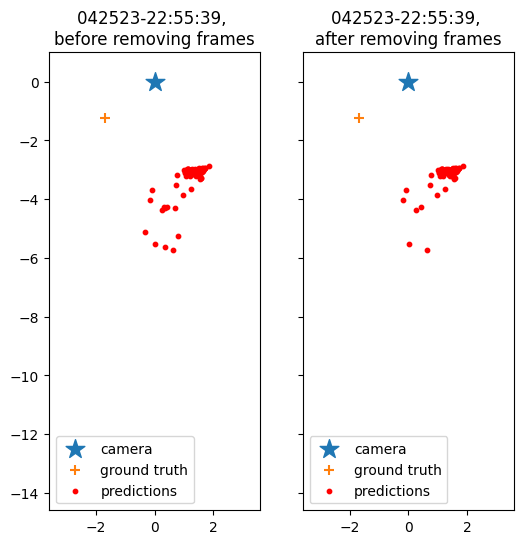

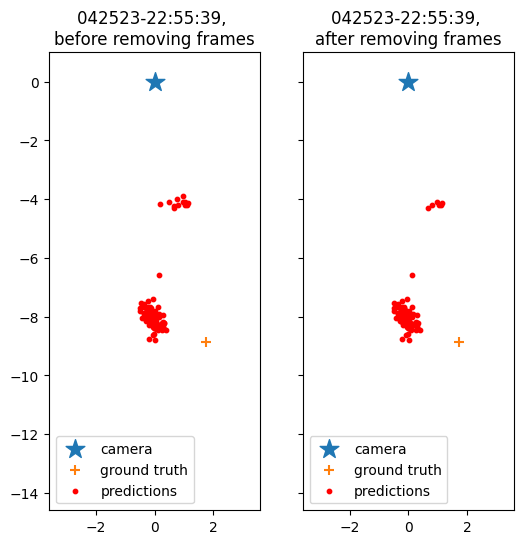

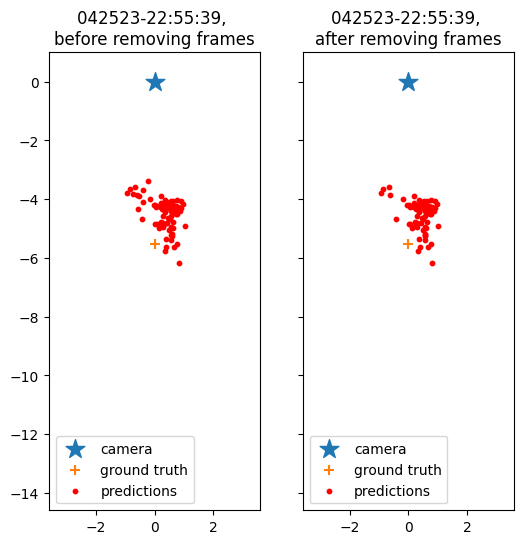

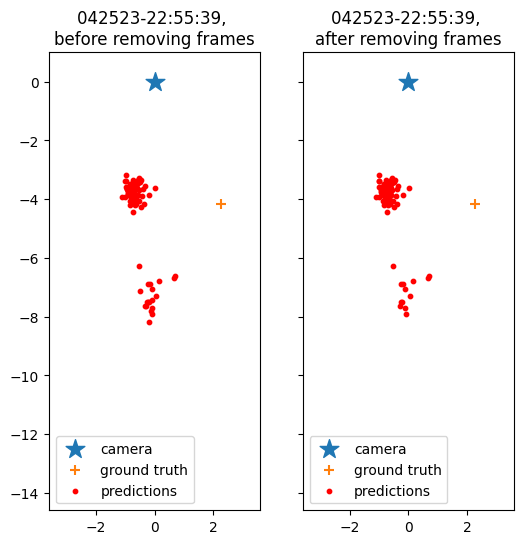

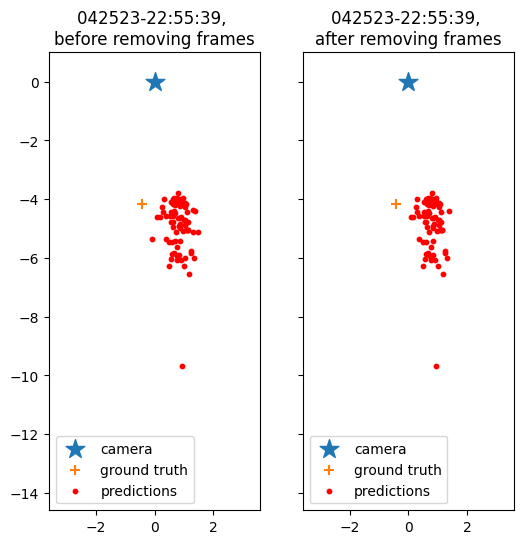

In [301]:
for i in range(len(unique_gt_225539)): 
    points = preds[np.where(np.all(gt==unique_gt_225539[i], axis=1))]
    fig, axes = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(6, 6))
    ax1, ax2 = axes
    ax1.scatter(0, 0, marker = '*', s = 200, label = 'camera')
    ax1.scatter(unique_gt_225539[i][0], unique_gt_225539[i][1], marker = '+', s = 50, label = 'ground truth')
    ax1.scatter(points[:, 0], points[:, 1], marker = 'o', c = 'r', s = 10, label = 'predictions')
    ax1.set_xlim(-3.6, 3.6)
    ax1.set_ylim(-14.6, 1)
    ax1.set_aspect('equal')
    ax1.legend()
    ax1.set_title("042523-22:55:39, \nbefore removing frames")

    points2 = preds2[np.where(np.all(gt2==unique_gt_225539[i], axis=1))]
    ax2.scatter(0, 0, marker = '*', s = 200, label = 'camera')
    ax2.scatter(unique_gt_225539[i][0], unique_gt_225539[i][1], marker = '+', s = 50, label = 'ground truth')
    ax2.scatter(points2[:, 0], points2[:, 1], marker = 'o', c = 'r', s = 10, label = 'predictions')
    ax2.set_xlim(-3.6, 3.6)
    ax2.set_ylim(-14.6, 1)
    ax2.set_aspect('equal')
    ax2.legend()
    ax2.set_title("042523-22:55:39, \nafter removing frames")

In [311]:
import random
def getColors(gt): 
    cols = np.zeros((len(gt),3))
    unique_gt = getUniquePts(gt)
    # randomly generate len(unique_gt) colors
    c = []
    for i in range(len(unique_gt)):
        color = np.array([random.randint(0, 1), random.randint(0, 1), random.randint(0, 1)])
        c.append(color)

    for i in range(len(unique_gt)):
        cols[np.where(np.all(gt==unique_gt[i], axis=1))] = c[i]

    return cols

colors1 = getColors(gt)
colors2 = getColors(gt2)
colors3 = getColors(gt3)
colors4 = getColors(gt4)

Text(0.5, 1.0, '14:32:34 after removing')

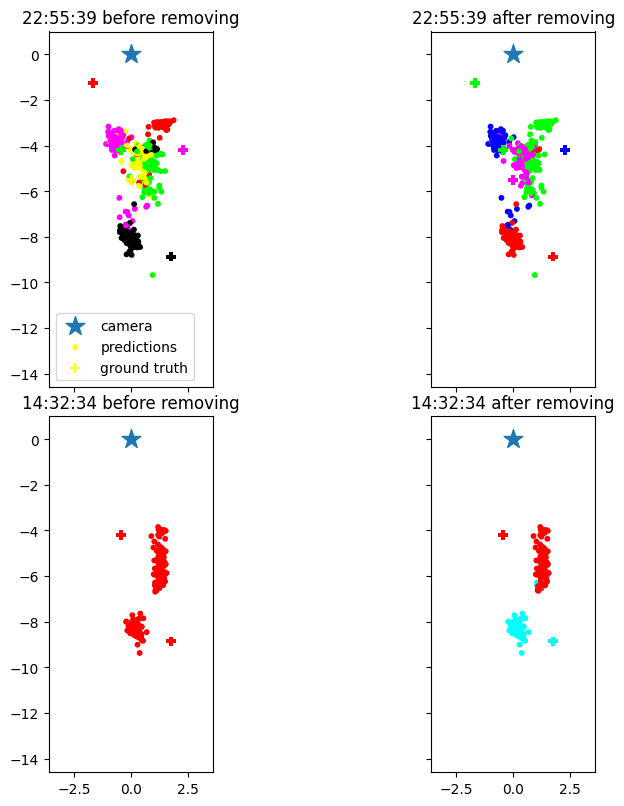

In [312]:
fig, axes = plt.subplots(2, 2, sharex='all', sharey='all', figsize=(8,8))
plt.tight_layout()
ax1, ax2, ax3, ax4 = axes.flatten()
ax1.scatter(0, 0, marker = '*', s = 200, label = 'camera')
ax1.scatter(preds[:, 0], preds[:, 1], marker = 'o', c = colors1, s = 10, label = 'predictions')
ax1.scatter(gt[:, 0], gt[:, 1], marker = '+', c = colors1, s = 50, label = 'ground truth')
ax1.set_xlim(-3.6, 3.6)
ax1.set_ylim(-14.6, 1)
ax1.set_aspect('equal')
ax1.legend()
ax1.set_title("22:55:39 before removing")

ax2.scatter(0, 0, marker = '*', s = 200, label = 'camera')
ax2.scatter(preds2[:, 0], preds2[:, 1], marker = 'o', c = colors2, s = 10, label = 'predictions')
ax2.scatter(gt2[:, 0], gt2[:, 1], marker = '+', c = colors2, s = 50, label = 'ground truth')
ax2.set_xlim(-3.6, 3.6)
ax2.set_ylim(-14.6, 1)
ax2.set_aspect('equal')
ax2.set_title("22:55:39 after removing")

ax3.scatter(0, 0, marker = '*', s = 200, label = 'camera')
ax3.scatter(preds3[:, 0], preds3[:, 1], marker = 'o', c = colors3, s = 10, label = 'predictions')
ax3.scatter(gt3[:, 0], gt3[:, 1], marker = '+', c = colors3, s = 50, label = 'ground truth')
ax3.set_xlim(-3.6, 3.6)
ax3.set_ylim(-14.6, 1)
ax3.set_aspect('equal')
ax3.set_title("14:32:34 before removing")

ax4.scatter(0, 0, marker = '*', s = 200, label = 'camera')
ax4.scatter(preds4[:, 0], preds4[:, 1], marker = 'o', c = colors4, s = 10, label = 'predictions')
ax4.scatter(gt4[:, 0], gt4[:, 1], marker = '+', c = colors4, s = 50, label = 'ground truth')
ax4.set_xlim(-3.6, 3.6)
ax4.set_ylim(-14.6, 1)
ax4.set_aspect('equal')
ax4.set_title("14:32:34 after removing")